In [74]:
%matplotlib inline

import xgboost as xgb
import common

import evaluate

In [75]:
train_data = "C:\\programming\\betting\\output\\nba\\train\\train.csv"
test_data = "C:\\programming\\betting\\output\\nba\\test\\train.csv"

In [76]:
X, y = common.read_data_from_file(train_data, "home_win", ["year", "date", "counter", "home_win", "home", "away"])
X_test, y_test = common.read_data_from_file(test_data, "home_win", ["year", "date", "counter", "home_win", "home", "away"])

dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test, label=y_test)

In [77]:
param = {'max_depth': 1, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [78]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [79]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.606973	train-auc:0.606734
[1]	eval-auc:0.643096	train-auc:0.650567
[2]	eval-auc:0.649891	train-auc:0.659179
[3]	eval-auc:0.658235	train-auc:0.669777
[4]	eval-auc:0.660741	train-auc:0.67482
[5]	eval-auc:0.659471	train-auc:0.683226
[6]	eval-auc:0.654495	train-auc:0.6839
[7]	eval-auc:0.654209	train-auc:0.690566
[8]	eval-auc:0.664069	train-auc:0.693105
[9]	eval-auc:0.666794	train-auc:0.69542


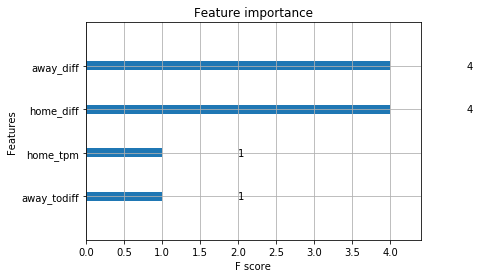

In [80]:
xgb.plot_importance(bst)

In [11]:
evaluate.evaluate("rs", bst, X_test, y_test)

AttributeError: 'DataFrame' object has no attribute 'feature_names'